In [6]:
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier , plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import xgboost as xgb
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [3]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"nadahaimn","key":"5051b2c6b805482c41f74c399be91dc1"}'}

In [4]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


!kaggle datasets download -d blastchar/telco-customer-churn


!unzip \*.zip

Dataset URL: https://www.kaggle.com/datasets/blastchar/telco-customer-churn
License(s): copyright-authors
  0% 0.00/172k [00:00<?, ?B/s]
100% 172k/172k [00:00<00:00, 98.3MB/s]
Archive:  telco-customer-churn.zip
  inflating: WA_Fn-UseC_-Telco-Customer-Churn.csv  


In [7]:
df = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [8]:
# drop unique values
df.drop('customerID', axis=1, inplace=True)
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [9]:
pd.plotting.register_matplotlib_converters()

%matplotlib inline
import seaborn as sns
from joblib import dump, load

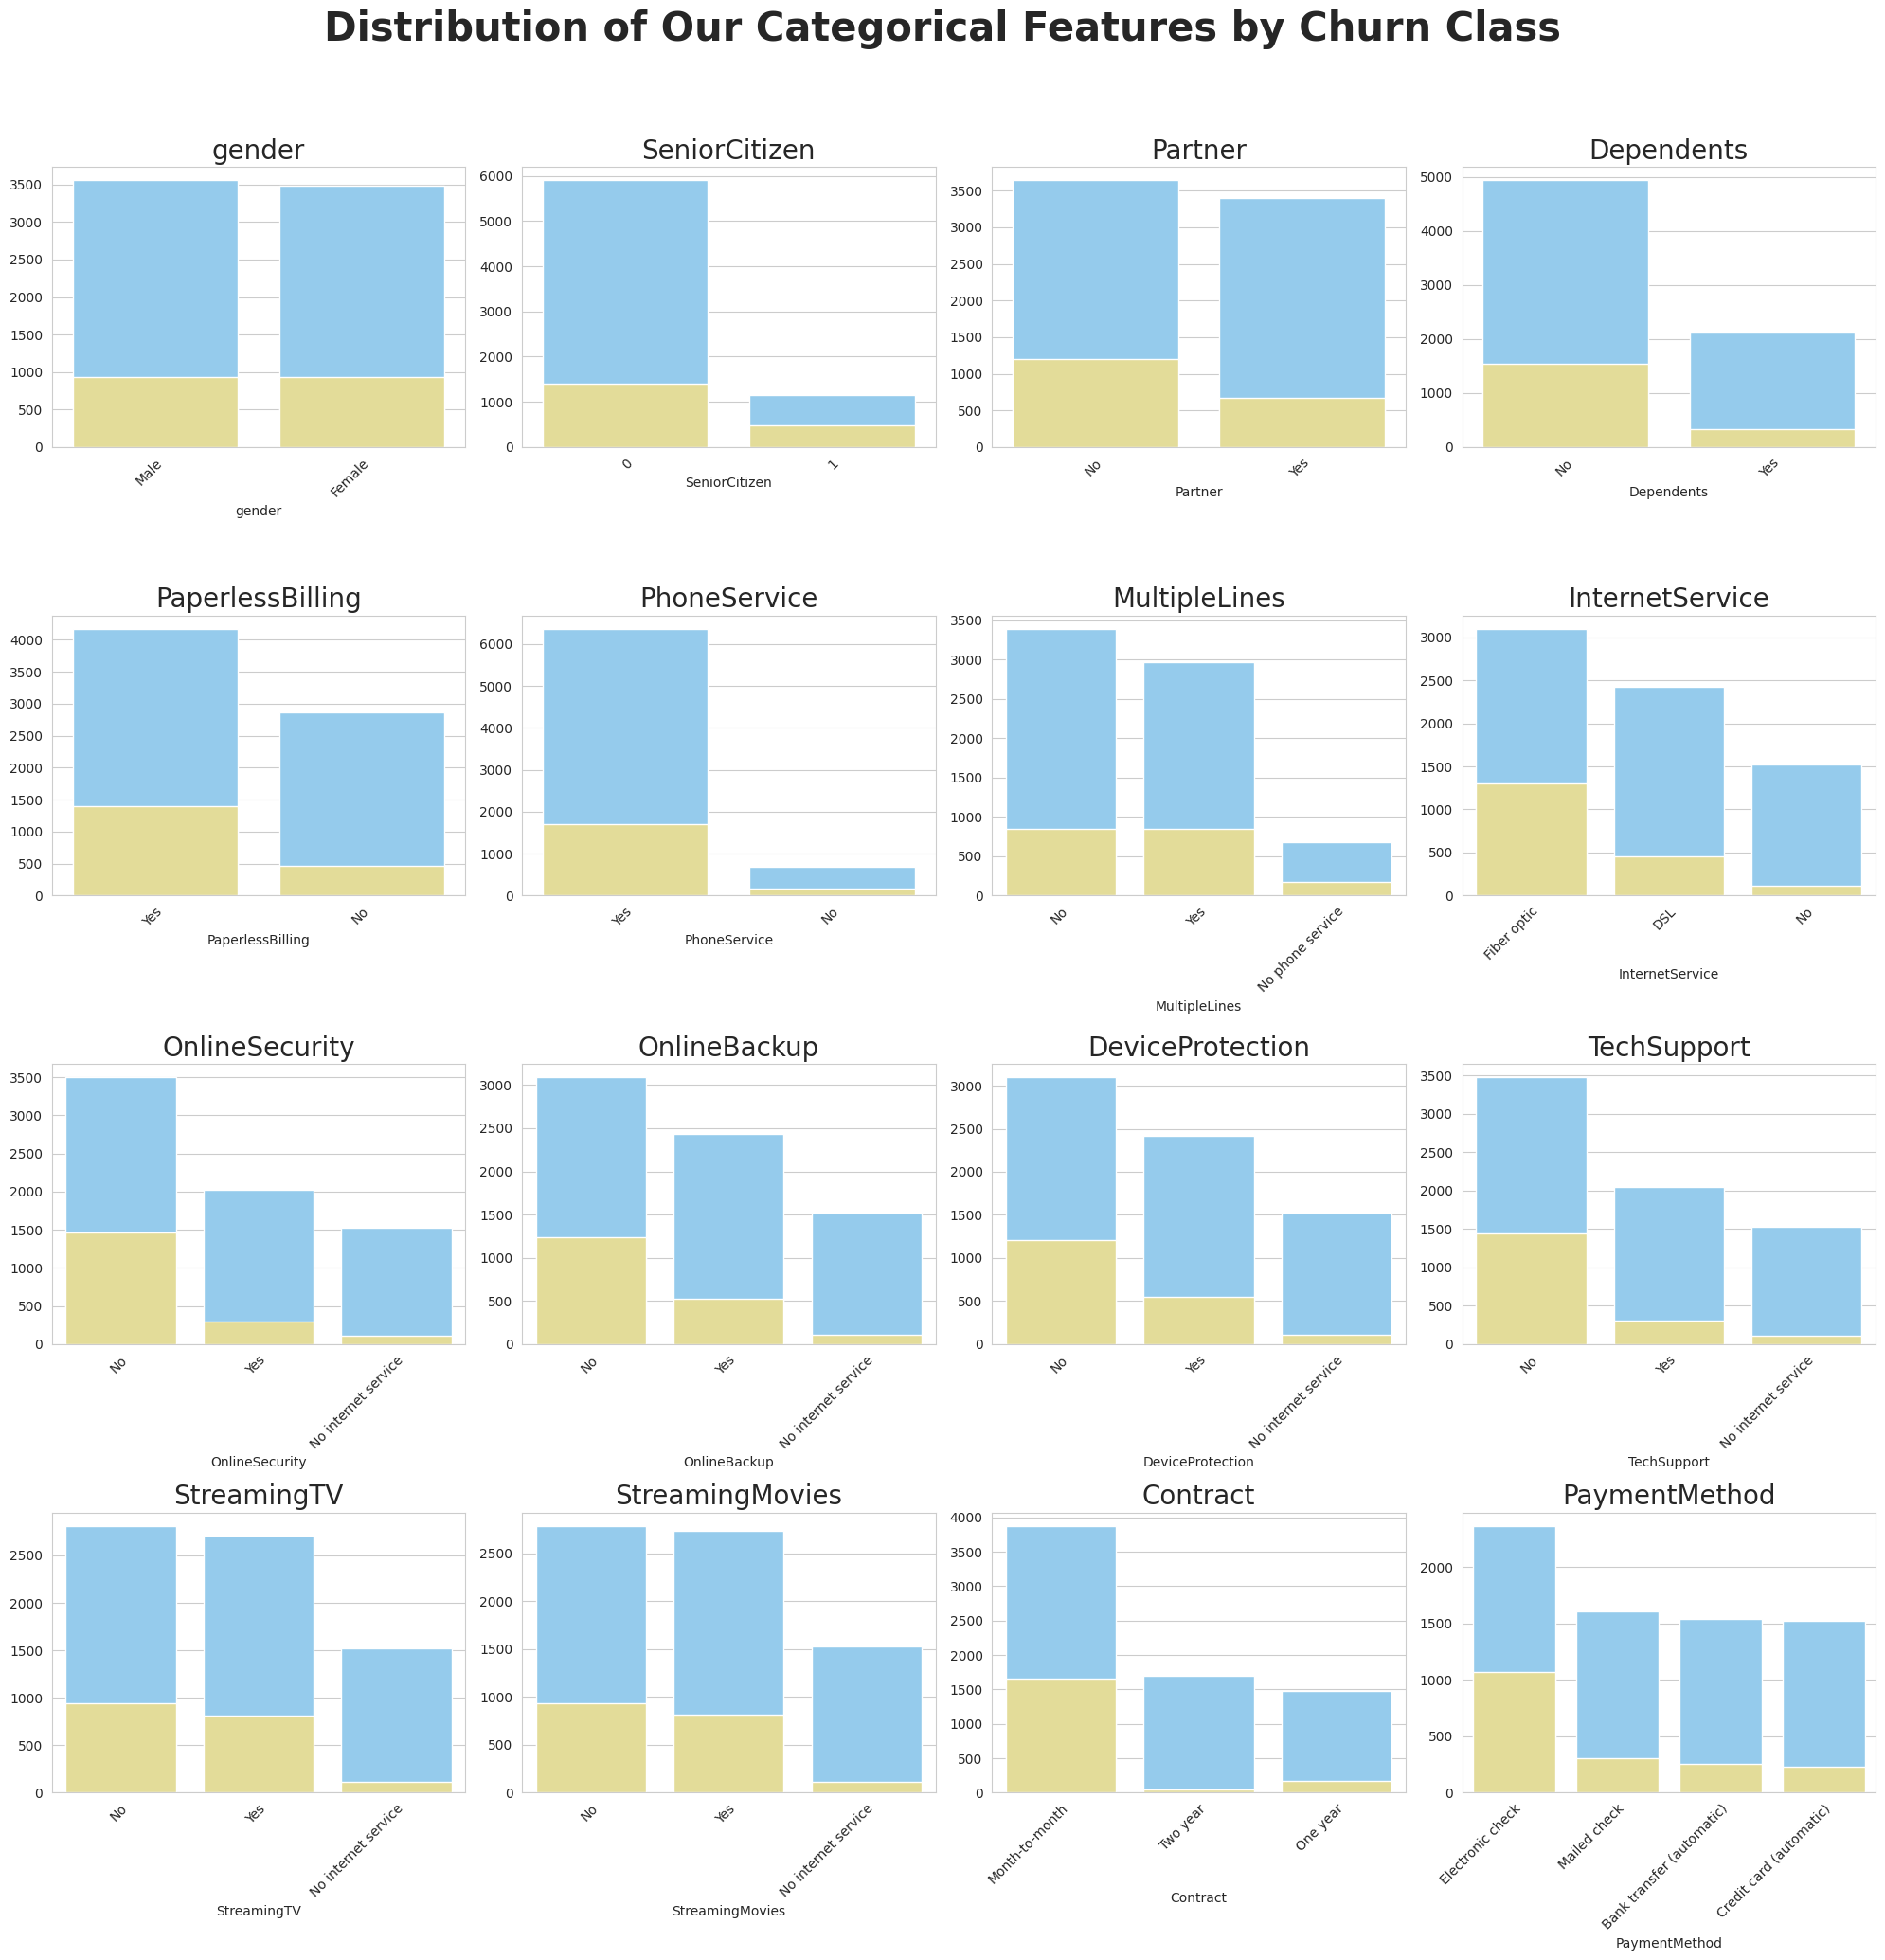

In [10]:
# Get a list of attributes to visualize
cat_cols_viz = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
                'PaperlessBilling', 'PhoneService', 'MultipleLines', 'InternetService',
                'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
                'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']


# Set style
sns.set_style('whitegrid')

# Set up subplot to display graphs
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20,20), sharex=False, sharey=False)
plt.suptitle('Distribution of Our Categorical Features by Churn Class',
             fontsize=30, fontweight='bold', y=1.032)

# Initialize row and column index iterators in preparation for filling in the subplot
row_iterator = 0
col_iterator = 0

# Fill in the subplot
for col in cat_cols_viz:
    # Adjust indices once we reach the end of a row (moving from left to right)
    if col_iterator == 4:
        col_iterator = 0
        row_iterator = row_iterator + 1


    # Initialize value count series
    valCount_series =df[col].value_counts()
    churn_valCount_series =df[df.Churn=='Yes'][col].value_counts()


    # Create the barplot (in blue) depicting customer count--by column
    sns.barplot(x=valCount_series.index, y=valCount_series.values, color='lightskyblue', ax=axes[row_iterator][col_iterator])

    # Create the barplot (in orange) depicting customer churn count--by column
    sns.barplot(x=churn_valCount_series.index, y=churn_valCount_series.values, color='khaki', ax=axes[row_iterator][col_iterator])

    # Label the graph
    axes[row_iterator][col_iterator].set_title('%s' % col, fontsize=20)

    # Rotate xlabels
    plt.sca(axes[row_iterator, col_iterator])
    plt.xticks(rotation=45, ha='right', rotation_mode='anchor')

    # Increment row and column indices
    col_iterator = col_iterator + 1


# Adjust spacing of subplot
fig.tight_layout()

In [ ]:
# check for zeros
(df==0).sum()

,0
gender,0
SeniorCitizen,5901
Partner,0
Dependents,0
tenure,11
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


In [ ]:
df.dtypes

,0
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object
OnlineBackup,object


In [ ]:
def lencode(df,col_name):
  label_encoder=LabelEncoder()
  encoded=label_encoder.fit_transform(df[col_name])
  label = dict(zip(label_encoder.classes_,label_encoder.transform(label_encoder.classes_)))
  print(label)
  df[col_name]=encoded
  return df

In [ ]:
df=lencode(df,'gender')
df=lencode(df,'Partner')
df=lencode(df,'Dependents')
df=lencode(df,'PhoneService')
df=lencode(df,'MultipleLines')
df=lencode(df,'InternetService')
df=lencode(df,'OnlineSecurity')
df=lencode(df,'OnlineBackup')
df=lencode(df,'DeviceProtection')
df=lencode(df,'TechSupport')
df=lencode(df,'StreamingTV')
df=lencode(df,'StreamingMovies')
df=lencode(df,'Contract')
df=lencode(df,'PaperlessBilling')
df=lencode(df,'PaymentMethod')
df=lencode(df,'Churn')

{'Female': 0, 'Male': 1}
{'No': 0, 'Yes': 1}
{'No': 0, 'Yes': 1}
{'No': 0, 'Yes': 1}
{'No': 0, 'No phone service': 1, 'Yes': 2}
{'DSL': 0, 'Fiber optic': 1, 'No': 2}
{'No': 0, 'No internet service': 1, 'Yes': 2}
{'No': 0, 'No internet service': 1, 'Yes': 2}
{'No': 0, 'No internet service': 1, 'Yes': 2}
{'No': 0, 'No internet service': 1, 'Yes': 2}
{'No': 0, 'No internet service': 1, 'Yes': 2}
{'No': 0, 'No internet service': 1, 'Yes': 2}
{'Month-to-month': 0, 'One year': 1, 'Two year': 2}
{'No': 0, 'Yes': 1}
{'Bank transfer (automatic)': 0, 'Credit card (automatic)': 1, 'Electronic check': 2, 'Mailed check': 3}
{'No': 0, 'Yes': 1}


In [ ]:
df.dtypes

,0
gender,int64
SeniorCitizen,int64
Partner,int64
Dependents,int64
tenure,int64
PhoneService,int64
MultipleLines,int64
InternetService,int64
OnlineSecurity,int64
OnlineBackup,int64


In [ ]:
#Solve the problem which there is an string with numbers in the column Totalcharge
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [ ]:
# check for nulls
df.isnull().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


In [ ]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,0,0,1,1,0,0,1,0,2,0,2,2,2,0,2,1,0,52.55,NaN,0
753,1,0,0,1,0,1,0,2,1,1,1,1,1,1,2,0,3,20.25,NaN,0
936,0,0,1,1,0,1,0,0,2,2,2,0,2,2,2,0,3,80.85,NaN,0
1082,1,0,1,1,0,1,2,2,1,1,1,1,1,1,2,0,3,25.75,NaN,0
1340,0,0,1,1,0,0,1,0,2,2,2,2,2,0,2,0,1,56.05,NaN,0
3331,1,0,1,1,0,1,0,2,1,1,1,1,1,1,2,0,3,19.85,NaN,0
3826,1,0,1,1,0,1,2,2,1,1,1,1,1,1,2,0,3,25.35,NaN,0
4380,0,0,1,1,0,1,0,2,1,1,1,1,1,1,2,0,3,20.00,NaN,0
5218,1,0,1,1,0,1,0,2,1,1,1,1,1,1,1,1,3,19.70,NaN,0
6670,0,0,1,1,0,1,2,0,0,2,2,2,2,0,2,0,3,73.35,NaN,0


                    gender  SeniorCitizen   Partner  Dependents    tenure  \
gender            1.000000      -0.001874 -0.001808    0.010517  0.005106   
SeniorCitizen    -0.001874       1.000000  0.016479   -0.211185  0.016567   
Partner          -0.001808       0.016479  1.000000    0.452676  0.379697   
Dependents        0.010517      -0.211185  0.452676    1.000000  0.159712   
tenure            0.005106       0.016567  0.379697    0.159712  1.000000   
PhoneService     -0.006488       0.008576  0.017706   -0.001762  0.008448   
MultipleLines    -0.006739       0.146185  0.142410   -0.024991  0.343032   
InternetService  -0.000863      -0.032310  0.000891    0.044590 -0.030359   
OnlineSecurity   -0.015017      -0.128221  0.150828    0.152166  0.325468   
OnlineBackup     -0.012057      -0.013632  0.153130    0.091015  0.370876   
DeviceProtection  0.000549      -0.021398  0.166330    0.080537  0.371105   
TechSupport      -0.006825      -0.151268  0.126733    0.133524  0.322942   

Text(0.5, 1.0, 'Correlation Heatmap')

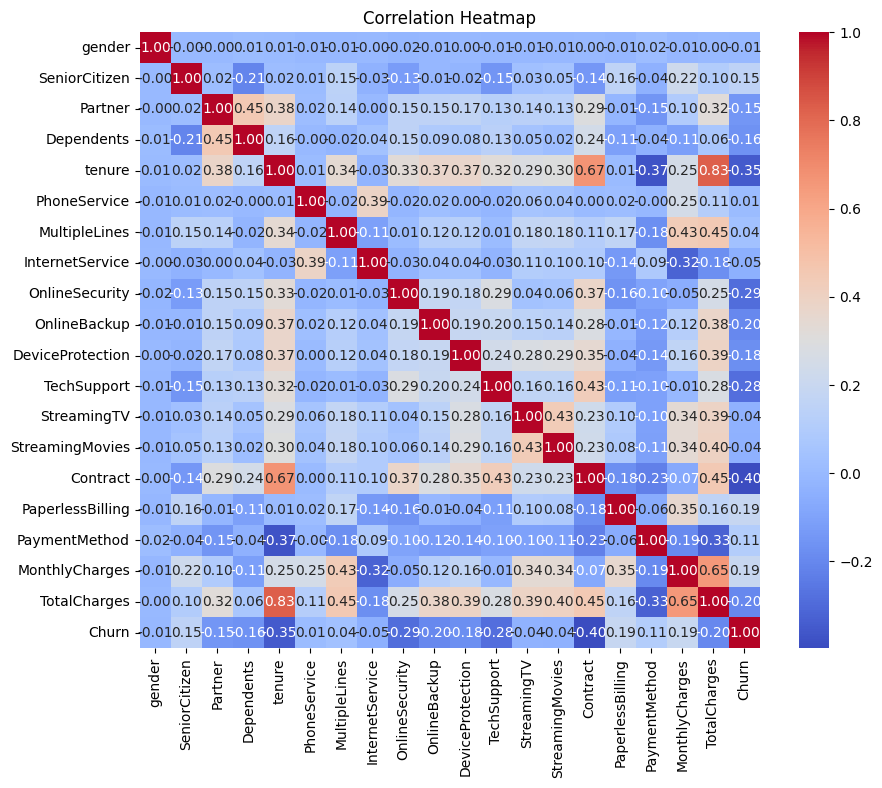

In [ ]:
numerical_data = df.select_dtypes(include=['float64', 'int64'])
print(numerical_data.corr())
# Plotting a heatmap of the correlation between numerical features
plt.figure(figsize=(10, 8))
sns.heatmap(numerical_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')

In [ ]:
x=df.drop('Churn',axis=1)
y=df['Churn']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)
x_train=pd.DataFrame(x_train_scaled,columns=x_train.columns)
x_test=pd.DataFrame(x_test_scaled,columns=x_test.columns)

In [ ]:
clf = DecisionTreeClassifier(criterion = "gini",random_state = 42,max_depth=12, min_samples_leaf=8)
clf.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=12, min_samples_leaf=8, random_state=42)

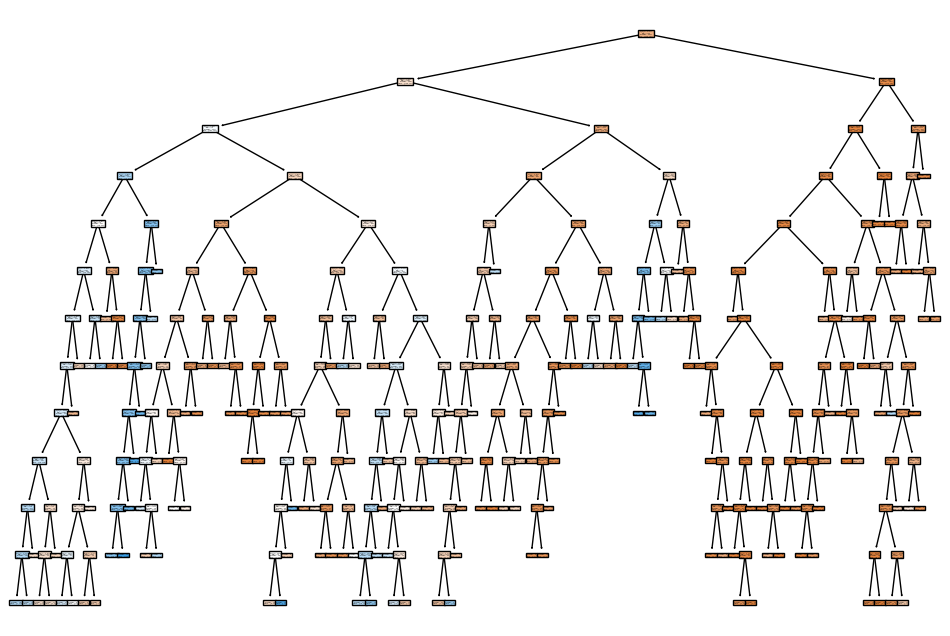

In [ ]:
# Drawing the tree
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

#Assuming 'dtree_model' is your trained DecisionTreeClassifier
plt.figure(figsize=(12,8))
plot_tree(clf,filled=True)
plt.show()

In [ ]:
y_pred = clf.predict(x_test)
y_pred

array([1, 0, 0, ..., 0, 0, 0])

In [ ]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred)
acc

0.8026969481902059

In [ ]:
xgb_classifier = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

# Train the classifier
xgb_classifier.fit(x_train, y_train)

# Make predictions on the test set
y_pred = xgb_classifier.predict(x_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
accuracy

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [08:06:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


0.7920511000709723

In [ ]:
df['TotalCharges'].fillna(df['TotalCharges'].mean(), inplace=True)

In [ ]:
x=df.drop('Churn',axis=1)
y=df['Churn']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
rf_c = RandomForestClassifier(n_estimators=2000, criterion='gini', random_state = 100 ,max_depth=12, min_samples_leaf=8)
rf_c.fit(x_train, y_train)

RandomForestClassifier(max_depth=12, min_samples_leaf=8, n_estimators=2000,
                       random_state=100)

In [ ]:
# Make predictions on the test set
y_pred = rf_c.predict(x_test)

from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred)
acc

0.8119233498935415